### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук
#### Кафедра информационных технологий

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 4


### Дисциплина: Методы машинного обучения

##### Студент:  Кузнецов Юрий Владимирович
##### Группа:   НФИ 01-20

## Москва 2023
***

### Вариант №13

1. Набор данных: diamonds

2. Независимые признаки: carat, table

3. Метка класса: color

4. Параметры глубокой нейронной сети: кол-во скрытых слоев – 3, кол-во нейронов в скрытом слое – 128.

### Задание:

В соответствии с индивидуальным заданием, указанным в записной книжке команды, выполните следующие работы:

1. Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимые признаки и метку класса.
2. Визуализируйте точки набора данных на плоскости с координатами, соответствующими двум независимым признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных.
3. Если признак с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации. Объединяйте классы таким образом, чтобы положительный и отрицательный классы были сопоставимы по количеству точек.
4. Разбейте набор данных из двух признаков и меток класса на обучающую и тестовую выборки. Постройте нейронную сеть с нормализующим слоем и параметрами, указанными в индивидуальном задании, для бинарной классификации и обучите ее на обучающей выборке. Оцените качество бинарной классификации при помощи матрицы ошибок для тестовой выборки.
5. Визуализируйте границы принятия решений построенной нейронной сетью на обучающей и тестовой выборках.
6. Визуализируйте ROC-кривую для построенного классификатора и вычислите площадь под ROC-кривой методом трапеций или иным методом.
7. Обучите на полном наборе данных нейронную сеть с одним слоем и одним выходным нейроном с функцией активации сигмоида и определите дополнительный признак, отличный от указанных в задании двух независимых признаков, принимающий непрерывные значения и являющийся важным по абсолютному значению веса в обученной нейронной сети.
8. Визуализируйте точки набора данных в трехмерном пространстве с координатами, соответствующими трем независимым признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных.
9. Разбейте полный набор данных на обучающую и тестовую выборки. Постройте нейронную сеть с нормализующим слоем и параметрами, указанными в индивидуальном задании, для многоклассовой классификации и обучите ее на обучающей выборке.
10. Постройте кривые обучения в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.

### Решение:

Загрузим заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимые признаки и метку класса:

In [1]:
import tensorflow_datasets as tfds
import pandas as pd

In [2]:
ds = tfds.load("diamonds", split='train')
df = tfds.as_dataframe(ds)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/53940 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/diamonds/1.0.0.incomplete46UAK8/diamonds-train.tfrecord*...:   0%|        …

Dataset diamonds downloaded and prepared to /root/tensorflow_datasets/diamonds/1.0.0. Subsequent calls will reuse this data.


In [3]:
df.rename(columns={name: name.removeprefix('features/') for name in list(df.columns. values)}, inplace=True)
df.head()

,carat,clarity,color,cut,depth,table,x,y,z,price
0,1.26,2,4,2,60.599998,60.0,6.97,7.00,4.23,6546.0
1,0.80,3,4,4,62.099998,54.0,5.96,5.99,3.71,3030.0
2,0.56,4,2,4,61.700001,54.0,5.28,5.32,3.27,1915.0
3,1.51,3,6,1,64.000000,58.0,7.24,7.27,4.64,6936.0
4,0.33,6,5,4,62.200001,54.0,4.43,4.45,2.76,646.0


In [4]:
data = df[['carat', 'table', 'color']]
data.head()

,carat,table,color
0,1.26,60.0,4
1,0.80,54.0,4
2,0.56,54.0,2
3,1.51,58.0,6
4,0.33,54.0,5


Визуализируем точки набора данных на плоскости с координатами, соответствующими двум независимым признакам, отображая точки различных классов разными цветами:

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [7]:
gen_color = lambda: "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
colors = {label: gen_color() for label in np.unique(data.color)}

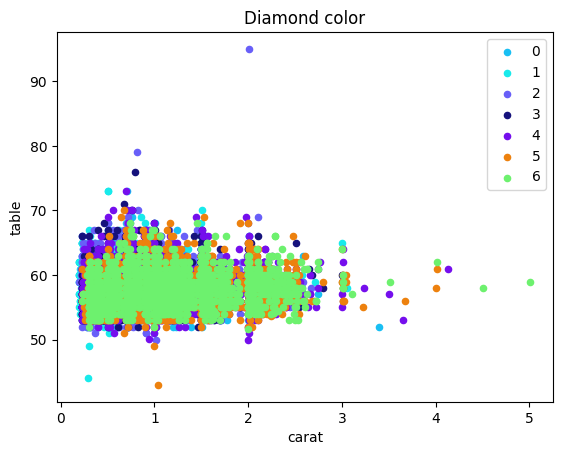

In [9]:
fig, ax = plt.subplots()
for key, group in data.groupby('color'):
  group.plot(ax=ax, kind='scatter', x='carat',
  y='table',
  label=key,
  color=colors[key]
)
plt.legend()
plt.title('Diamond color')
plt.show()

Если признак с метками классов содержит более двух классов, то объединим некоторые классы, чтобы получить набор для бинарной классификации. Объединим классы таким образом, чтобы положительный и отрицательный классы были сопоставимы по количеству точек:

In [10]:
data = data.sort_values(by='color').reset_index(drop=True)
labels = np.full(data.shape[0], 0)
labels[data.shape[0]//2:] = 1
data.color = labels
data

,carat,table,color
0,1.01,59.0,0
1,0.90,58.0,0
2,0.70,55.0,0
3,0.40,59.0,0
4,0.34,58.0,0
...,...,...,...
53935,1.00,52.0,1
53936,1.26,53.0,1
53937,1.51,58.0,1
53938,0.39,56.0,1


In [11]:
np.unique(data.color, return_counts=True)

(array([0, 1]), array([26970, 26970]))

Разобьём набор данных из двух признаков и меток класса на обучающую и тестовую выборки. Построим нейронную сеть с нормализующим слоем и параметрами, указанными в индивидуальном задании, для бинарной классификации и обучим ее на обучающей выборке. Оценим качество бинарной классификации при помощи матрицы ошибок для тестовой выборки:

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf

In [13]:
X = data.drop(columns=['color'])
y = data.color

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

In [14]:
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(X)

In [15]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    epochs=64,
    verbose=0
)

In [16]:
def confusion_matrix(y_true, y_predict):
  assert len(y_true) == len(y_predict)
  tn = np.sum((y_true == 0) & (y_predict == 0))
  tp = np.sum((y_true == 1) & (y_predict == 1))
  fn = np.sum((y_true == 1) & (y_predict == 0))
  fp = np.sum((y_true == 0) & (y_predict == 1))

  print('Confusion matrix:')
  print(tp, '\t', fn, sep='')
  print(fp, '\t', tn, sep='')

  return np.array([
    [tp, fn],
    [fp, tn]
  ])

y_pred = model.predict(X_test, verbose=0).round().reshape(-1, )
confusion_matrix(y_test, y_pred)
print('\nReport:')
print(classification_report(y_test, y_pred))

Confusion matrix:
2913	3799
1443	5330

Report:
              precision    recall  f1-score   support

           0       0.58      0.79      0.67      6773
           1       0.67      0.43      0.53      6712

    accuracy                           0.61     13485
   macro avg       0.63      0.61      0.60     13485
weighted avg       0.63      0.61      0.60     13485



Визуализируем границы принятия решений построенной нейронной сетью на обучающей и тестовой выборках:

In [17]:
def plot_decision_boundary(model, X, y):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
  X_in = np.c_[xx.ravel(), yy.ravel()]
  y_pred = model.predict(X_in, verbose=0)
  if len(y_pred[1]) > 1:
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    y_pred = np.round(y_pred).reshape(xx.shape)
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

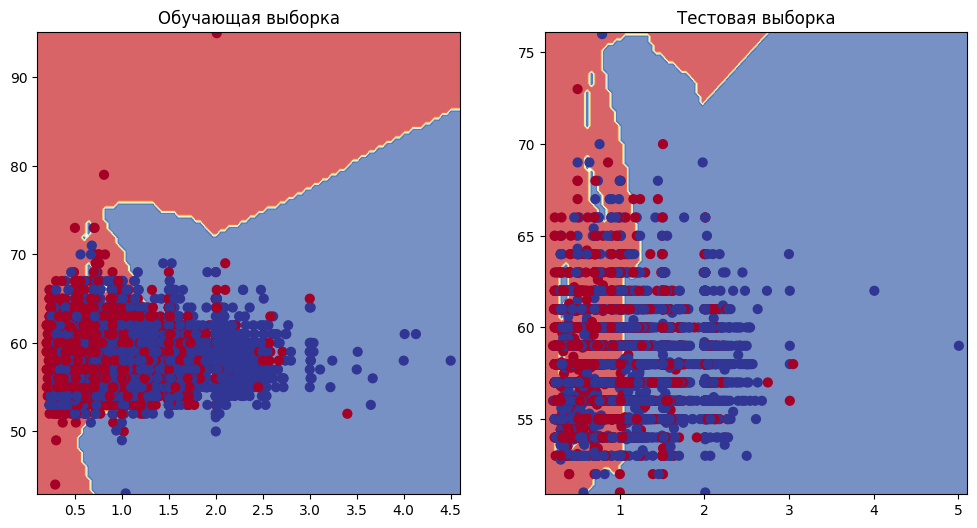

In [18]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Обучающая выборка")
plot_decision_boundary(model, X=np.array(X_train), y=np.array(y_train))
plt.subplot(1, 2, 2)
plt.title("Тестовая выборка")
plot_decision_boundary(model, X=np.array(X_test), y=np.array(y_test))

Визуализируем ROC-кривую для построенного классификатора и вычислим площадь под ROC-кривой методом трапеций или иным методом:

In [19]:
from sklearn.metrics import roc_curve
from scipy.integrate import simpson

In [20]:
y_score = model.predict(X_test, verbose=0).reshape(-1, )
fpr, tpr, thresholds = roc_curve(y_test, y_score)

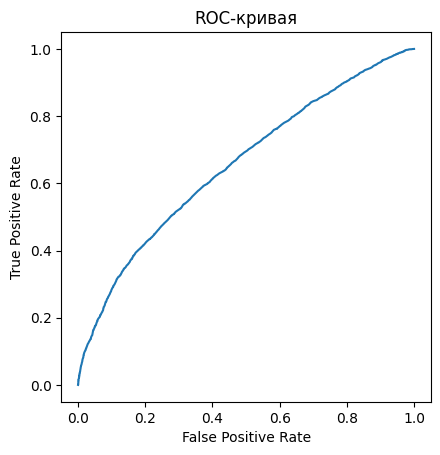

In [21]:
plt.plot(fpr, tpr)

plt.axis("square")
plt.title('ROC-кривая')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.show()

In [22]:
print('Площадь под ROC-кривой: %.4f' % simpson(tpr, fpr))

Площадь под ROC-кривой: 0.6101


Обучим на полном наборе данных нейронную сеть с одним слоем и одним выходным нейроном с функцией активации сигмоида и определим дополнительный признак, отличный от указанных в задании двух независимых признаков, принимающий непрерывные значения и являющийся важным по абсолютному значению веса в обученной нейронной сети:

In [23]:
data = df.sort_values(by='color').reset_index(drop=True)
labels = np.full(data.shape[0], 0)
labels[data.shape[0]//2:] = 1
data.color = labels
data

,carat,clarity,color,cut,depth,table,x,y,z,price
0,1.01,1,0,2,58.299999,59.0,6.63,6.67,3.88,4588.0
1,0.90,1,0,3,58.700001,58.0,6.30,6.28,3.69,3578.0
2,0.70,2,0,4,62.500000,55.0,5.68,5.72,3.56,2726.0
3,0.40,3,0,3,62.400002,59.0,4.70,4.72,2.94,982.0
4,0.34,2,0,3,62.400002,58.0,4.46,4.42,2.77,803.0
...,...,...,...,...,...,...,...,...,...,...
53935,1.00,2,1,0,64.699997,52.0,6.35,6.30,4.09,3780.0
53936,1.26,1,1,4,62.500000,53.0,6.86,6.90,4.30,4656.0
53937,1.51,4,1,4,61.599998,58.0,7.35,7.43,4.55,8067.0
53938,0.39,3,1,1,63.299999,56.0,4.60,4.63,2.92,581.0


In [24]:
X = data.drop(columns=['color'])
y = data.color

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=['accuracy']
)

model.fit(X, y, epochs=32, verbose=0)

In [26]:
weights = np.array(model.layers[0].kernel)
weights = np.abs(weights)
weights = weights.sum(axis=1)
X.columns[np.argmax(weights)]

'carat'

Визуализируем точки набора данных в трехмерном пространстве с координатами, соответствующими трем независимым признакам, отображая точки различных классов разными цветами:

In [27]:
data = df[['carat', 'table', 'carat', 'color' ]]
data.head()

,carat,table,carat,color
0,1.26,60.0,1.26,4
1,0.80,54.0,0.80,4
2,0.56,54.0,0.56,2
3,1.51,58.0,1.51,6
4,0.33,54.0,0.33,5


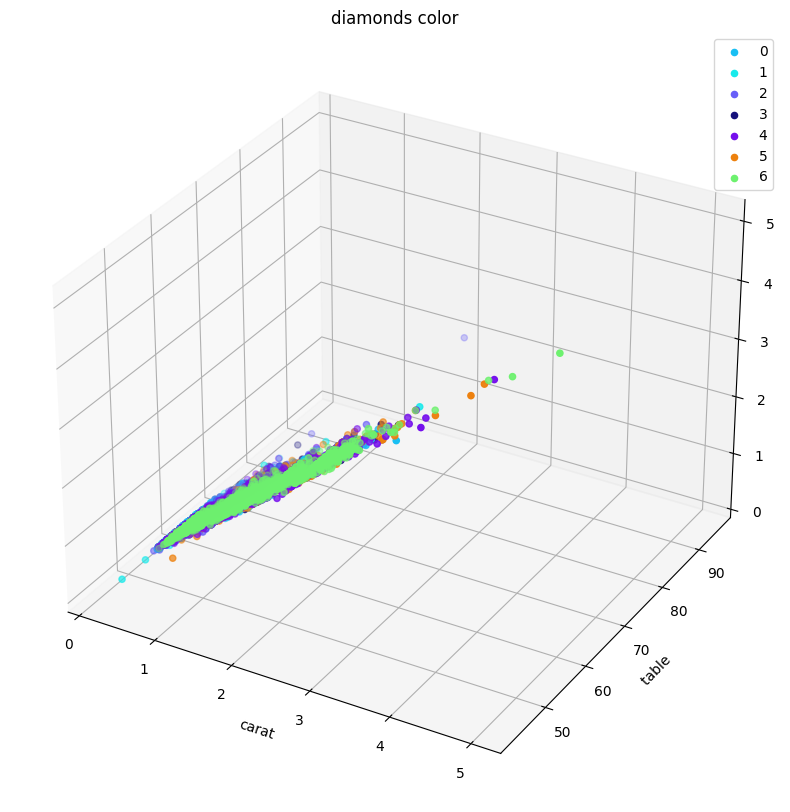

In [28]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 10))

for grp_name, grp_idx in data.groupby('color').groups.items():
  x = data.iloc[grp_idx, 0]
  y = data.iloc[grp_idx, 1]
  z = data.iloc[grp_idx, 2]
  ax.scatter(x, y, z, label=grp_name, color=colors[grp_name])

ax.legend()

ax.set_xlabel('carat')
ax.set_ylabel('table ')
ax.set_title('diamonds color')

plt.show()

Разобьём полный набор данных на обучающую и тестовую выборки. Построим нейронную сеть с нормализующим слоем и параметрами, указанными в индивидуальном задании, для многоклассовой классификации и обучим ее на обучающей выборке:

In [29]:
from sklearn.preprocessing import LabelBinarizer

In [30]:
X = df.drop(columns=['color'])
y = df.color

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, shuffle=True, stratify=y)

y_train_label = LabelBinarizer().fit_transform(y_train)
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(X)

In [31]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=7, activation='softmax')
])

model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train_label,
    epochs=8,
    validation_split = 0.3,
    verbose=0,
)

In [32]:
y_pred = model.predict(X_test, verbose=0).argmax(axis=1)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.47      0.50      0.49      1694
           1       0.37      0.43      0.40      2449
           2       0.37      0.26      0.30      2385
           3       0.48      0.51      0.49      2823
           4       0.46      0.40      0.43      2076
           5       0.48      0.56      0.52      1356
           6       0.57      0.65      0.61       702

    accuracy                           0.44     13485
   macro avg       0.46      0.47      0.46     13485
weighted avg       0.44      0.44      0.44     13485



Построим кривые обучения в зависимости от эпохи обучения:

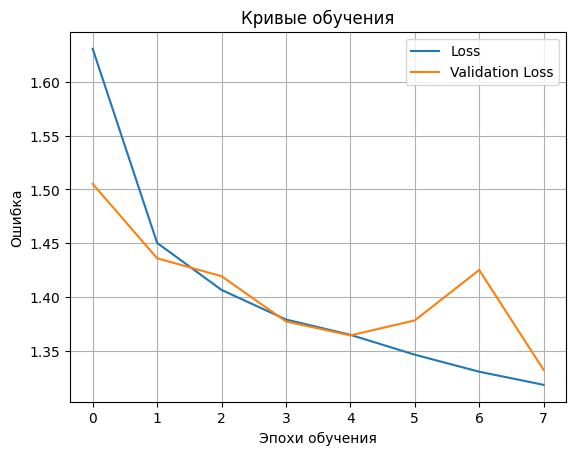

In [33]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title('Кривые обучения')
  plt.xlabel('Эпохи обучения')
  plt.ylabel('Ошибка')
  plt.legend()
  plt.grid(True)

plot_loss(history)